# [부교재] Chapter10 상관분석과 회귀분석

- <a href="#10.1상관분석">10.1 상관분석</a>
- <a href="#10.2회귀분석">10.2 회귀분석</a>
- <a href="#사이킷런을이용한선형회귀">사이킷런을 이용한 선형회귀</a>

In [165]:
# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

-----------------------------

## <a name="10.1상관분석">10.1 상관분석</a> (correlation analysis)

### 관련성을 분석하는 통계적 방법
- **상관분석(correlation analysis)** <br> 
변수 간에 존재하는 **선형 관련성 정도**를 **상관계수**를 이용하여 분석하는 방법
- **회귀분석(regression analysis)** <br>
변수가 **다른 변수에 영향을 미치는 관계를 식별**하기 위한 통계적 방법

### [실습] 산점도와 상관계수
학생 건강검사 자료(2019년도 학생 건강검사 표본통계, 교육부) 중 서울지역 
초등학교 3학년 남학생에 대한 표본에 대해 키와 몸무게를 이용하여 산점도를 
나타내고 상관계수를 계산하시오. 

In [166]:
!pip install openpyxl

In [167]:
# 1. 데이터 확인
import pandas as pd

df = pd.read_excel('./data/초등학교3학년_남자.xlsx')
df
df.describe()

,키,몸무게
count,98.000000,98.000000
mean,132.130612,31.536735
std,12.395954,9.699361
min,110.900000,17.200000
25%,122.975000,24.150000
50%,131.150000,28.950000
75%,140.725000,39.575000
max,163.000000,56.700000


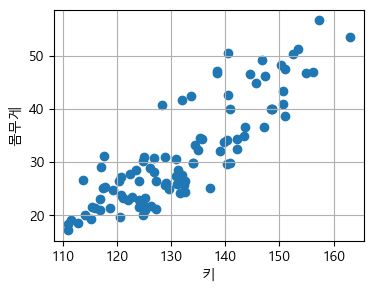

In [168]:
# 2. 산점도로 확인
import matplotlib.pyplot as plt

plt.scatter(df.키, df.몸무게)
plt.xlabel('키')
plt.ylabel('몸무게')
plt.grid()
plt.show()

In [170]:
# 표본 상관계수(print(df.corr(method='pearson')) 확인
import scipy as sp

corr = sp.stats.pearsonr(df.키, df.몸무게) # 피어슨 상관계수
print(f'scipy stats 피어슨상관계수: {corr}')
print()
# pandas print(df.corr(method='pearson'))
print(f'pandas 피어슨상관계수: {df.corr(method="pearson")}')

scipy stats 피어슨상관계수: PearsonRResult(statistic=0.8583011404409242, pvalue=1.4375440398437812e-29)

pandas 피어슨상관계수:             키       몸무게
키    1.000000  0.858301
몸무게  0.858301  1.000000


---------------------------

### #상관계수의 검정

### [실습] 예제 10-1: 표본상관계수 구하기
어떤 반응 실험에서 원료의 첨가량(X)과 반응수율(Y)의 관계 자료 10개를 임의로 추출하여 얻은 결과이다. 이때 X, Y의 표본상관계수를 구하가 

In [171]:
# 산점도 그리기
def draw_correlation_diagram(a, b, xlabel='X', ylabel='Y'):
    import matplotlib.pyplot as plt

    plt.scatter(a, b)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"'{xlabel}'과 '{ylabel}'간의 상관도")
    plt.grid()  #axis = 'x', axis = 'y'
    plt.show()    
    
# 표본상관계수(피어슨 상관계수)로 변수간 상관관계 확인하기 
def get_correlation_coefficient(a, b):
    import scipy as sp
    
    corr = sp.stats.pearsonr(a, b)
    print(f'두 변수간 표본상관계수: {corr[0] : .4f}')
    if corr[0] > 0.4 :   # 양의 상관 관계가 있다.
        print(f'두 변수간 양의 상관관계를 가진다.')
    elif corr[0] < -0.4 : # 음의 상관 관계가 있다.
        print(f'두 변수간 음의 상관관계를 가진다.')
    else:
        print(f'두 변수간 상관관계를 가진다고 볼 수 없다.')
    return corr[0]

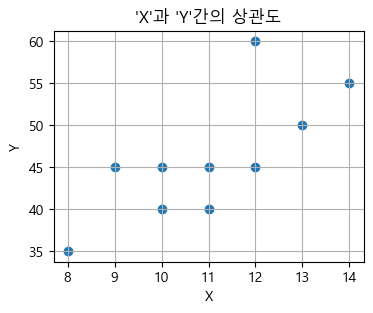

두 변수간 표본상관계수:  0.7423
두 변수간 양의 상관관계를 가진다.


0.7423074889580903

In [172]:
data = {'X':[12, 13, 14, 10, 11, 8, 10, 11, 12, 9],
        'Y':[45, 50, 55, 40, 40, 35, 45, 45, 60, 45]}

df = pd.DataFrame(data)
# print('변수간 상관계수: ', df.corr(method="pearson") )
# print()

draw_correlation_diagram(df.X, df.Y, xlabel='X', ylabel='Y')
get_correlation_coefficient(df.X, df.Y)

### [실습] 예제 10-2: 표본상관계수  & 상관도
어떤 고가도로의 시간당 최고 교통량(X)과 일일 교통량(Y)을 7일 동안 관측한 결과, X와 Y의 상관도를 그리고 표본상관계수를 구하라

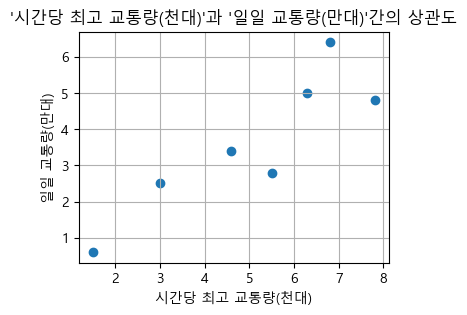

두 변수간 표본상관계수:  0.8855
두 변수간 양의 상관관계를 가진다.


0.8855243197130095

In [173]:
data = {'X':[1.5, 4.6, 3.0, 5.5, 7.8, 6.8, 6.3],
        'Y':[0.6, 3.4, 2.5, 2.8, 4.8, 6.4, 5.0]}

df = pd.DataFrame(data)

draw_correlation_diagram(df.X, df.Y, xlabel='시간당 최고 교통량(천대)', ylabel='일일 교통량(만대)')
get_correlation_coefficient(df.X, df.Y)

### [실습] 예제 10-3: 표본상관계수
한 연구자가 사람의 연령(X)과 최대 맥박수(Y)의 관계를 알아보기 위해 연령별로 최대 맥박수를 측정한 결과가 아래와 같을 때, 연령과 최대 맥박수 간의 표본상관계수를 구하라

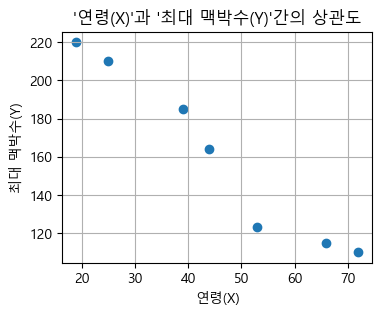

두 변수간 표본상관계수: -0.9753
두 변수간 음의 상관관계를 가진다.


-0.9752727082125798

In [174]:
data = {'X':[25, 39, 19, 44, 53, 66, 72],
        'Y':[210, 185, 220, 164, 123, 115, 110]}

df = pd.DataFrame(data)

draw_correlation_diagram(df.X, df.Y, xlabel='연령(X)', ylabel='최대 맥박수(Y)')
get_correlation_coefficient(df.X, df.Y)

### [실습] 예제 10-4: 표본상관계수, 5%유의수준 검정
수학성적(X)과 어휘력(Y)의 상관관계를 알아보기 위해 학생 8명을 임의로 추출하였다.<br>
- a.표본상관계수 r을 구하라.
- b.수학성정(X)과 어휘력(Y) 간의 상관관계가 존재하는지 유의수준 5%로 검정하라

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
- interval(confidence, df, loc=0, scale=1)

In [175]:
rv = sp.stats.t(df=n-2)     # 자유도: 독립변수의 수 (2개)
interval = rv.interval(1-alpha)
interval

(-2.4469118487916806, 2.4469118487916806)

In [176]:
def uncorr_test(n, r, H0, alpha=0.05):  # 무상관 검정
    import scipy as sp
    
    rv = sp.stats.t(df=n-2)            # 변수 1개: n-1, 변수 2개: n-2
    interval = rv.interval(1-alpha)    # 분포구간    
    
    t0 = r * np.sqrt( (n-2)/(1-r**2) ) # 검정통계량 관측값
    print(f'신뢰구간: {interval}, 검정통계량 관측값: {t0: .4f}')
    
    if interval[0] <= t0 <= interval[1]:
        print(f"귀무가설[ {H0} ]을 채택")
    else:
        print(f"귀무가설[ {H0} ]을 기각 -> 상관관계 있다") 
    

data = {'X':[36, 80, 50, 58, 72, 60, 56, 68],
        'Y':[35, 65, 60, 39, 48, 44, 48, 61]}

df = pd.DataFrame(data)

# 상관도
#draw_correlation_diagram(df.X, df.Y, xlabel='수학 성적(X)', ylabel='어휘력(Y)')
# 상관계수
corr = get_correlation_coefficient(df.X, df.Y)

# 상관관계 유의수준 검정
H0 = f'H0: p=0(변수간 상관관계가 없다)'  # 모상관계수는 0--> 상관이 없다
uncorr_test(len(df.X), corr, H0)

두 변수간 표본상관계수:  0.6264
두 변수간 양의 상관관계를 가진다.
신뢰구간: (-2.4469118487916806, 2.4469118487916806), 검정통계량 관측값:  1.9683
귀무가설[ H0: p=0(변수간 상관관계가 없다) ]을 채택


### [실습] 예제 10-5: 표본상관계수, 5%유의수준 검정
어떤 세닥 공장에서 물 소비량(X)과 세탁량(Y) 사이의 상관관계가 존재하는지 조사하기 위해 표본을 다음과 같이 얻다. 공장 전체의 물 소비량과 세탁량은 이변량 정규분포를 따른다고 가정할 때,  <br>
- a.표본상관계수 r을 구하라.
- b.물 소비량(X)과 세탁량(Y) 사이의 상관관계가 존재하는지 유의수준 5%로 검정하라

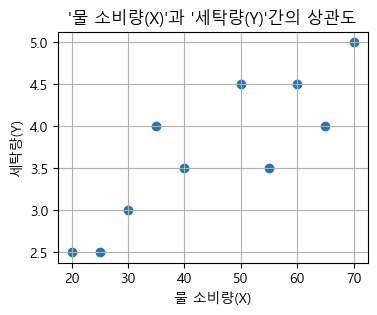

두 변수간 표본상관계수:  0.8536
두 변수간 양의 상관관계를 가진다.
신뢰구간: (-2.3060041350333704, 2.3060041350333704), 검정통계량 관측값:  4.6349
귀무가설[ H0: p=0(변수간 상관관계가 없다) ]을 기각 -> 상관관계 있다


In [177]:
data = {'X':[20, 30, 25, 40, 35, 50, 70, 60, 65, 55],
        'Y':[2.5, 3.0, 2.5, 3.5, 4.0, 4.5, 5.0, 4.5, 4.0, 3.5]}

df = pd.DataFrame(data)

# 상관도
draw_correlation_diagram(df.X, df.Y, xlabel='물 소비량(X)', ylabel='세탁량(Y)')
# 상관계수
corr = get_correlation_coefficient(df.X, df.Y)

# 상관관계 유의수준 검정
H0 = f'H0: p=0(변수간 상관관계가 없다)'  # 모상관계수는 0--> 상관이 없다
uncorr_test(len(df.X), corr, H0)

### [실습] 예제 10-6: 표본상관계수, 5%유의수준 검정
연령(X)과 최대 맥박수(Y)의 상관관계가 있는지 유의수준 5%로 검정하라

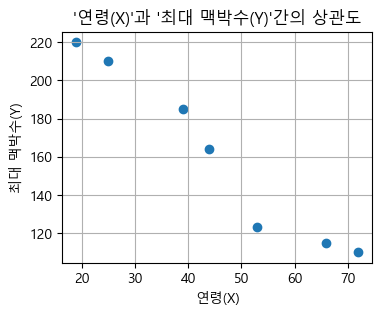

두 변수간 표본상관계수: -0.9753
두 변수간 음의 상관관계를 가진다.
신뢰구간: (-2.5705818366147395, 2.5705818366147395), 검정통계량 관측값: -9.8675
귀무가설[ H0: p=0(변수간 상관관계가 없다) ]을 기각 -> 상관관계 있다


In [178]:
data = {'X':[25, 39, 19, 44, 53, 66, 72],
        'Y':[210, 185, 220, 164, 123, 115, 110]}

df = pd.DataFrame(data)

# 상관도
draw_correlation_diagram(df.X, df.Y, xlabel='연령(X)', ylabel='최대 맥박수(Y)')
# 상관계수
corr = get_correlation_coefficient(df.X, df.Y)

# 상관관계 유의수준 검정
H0 = f'H0: p=0(변수간 상관관계가 없다)'  # 모상관계수는 0--> 상관이 없다
uncorr_test(len(df.X), corr, H0)

------------------------------------------------------

## <a name="10.2회귀분석">10.2 회귀분석</a>

### 회귀분석(regression analysis)** 
- 변수가 **다른 변수에 영향을 미치는 관계를 식별**하기 위한 통계적 방법
- 두 변수 간의 관계를 파악하여 **한 변수의 값으로부터 그에 대응하는 다른 변수의 값을 예측**하고자 할 때 사용하는 통계적 방법
<br><br>
- **독립변수(independent variable)** : 다른 변수에 영향을 주는 변수, 설명변수(explanatory variable)
- **종속변수(dependent variable)** : 영향을 받는 변수, 반응변수(response variable)

### 단순선형회귀모형(simple linear regression model) : 직선회귀모형

 - $y_i = a + bx_i + e_i$   $(e_i ~ N(0,\sigma^2), i=1,2,...,n)$ <br><br>
 - $a, b$ : 모회귀계수
 - $x_i$  : 독립변수(설명변수), $y_i$:종속변수(반응변수)
 - $e_i$  : $N(0,\sigma^2)$을 따르는 확률변수(오차항) <br><br>
 -- **==> 모회귀계수 $a, b$를 추정함으로서 회귀직선을 추정할 수 있다!**

### [실습] 단순 회귀분석

In [179]:
# 1. 데이터 확인
import pandas as pd

cm = 2.54  # 키데이터를  inch --> cm로 변환하기 위해
# df = pd.read_excel('./data/Galtons Height Data.xlsx')
# df['father'] = df.father * cm
# df['mother'] = df.mother * cm
# df['height'] = df.height * cm
# df= df.query("gender=='F'")  # 자녀가 딸인 데이터만 추출

df = pd.read_excel('./data/Galtons Height Data_딸.xlsx')
df['father'] = df.father * cm
df['daughter'] = df.daughter * cm

df

,father,daughter
0,199.39,175.768
1,199.39,175.260
2,199.39,175.260
3,191.77,166.370
4,191.77,166.370
...,...,...
428,157.48,154.940
429,158.75,144.780
430,173.99,162.560
431,173.99,161.290


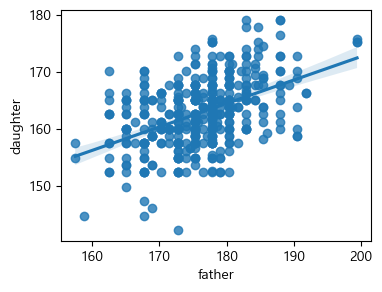

In [180]:
# 2. 산점도(추정된 회귀직선 표시) 확인
# 방법: seaborn 사용하기
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=df.father, y=df.daughter)
plt.xlabel('father')
plt.ylabel('daughter')
plt.show()

In [182]:
# 3. 결정계수 구하기
# 방법: statsmodels 사용하기
from statsmodels.formula.api import ols

model = ols('df.daughter ~ df.father', data=df).fit() #ols('종속변수명 ~ 독립변수명', data=데이터프레임객체)

print(f'결정계수: {model.rsquared: .4f}')

model.summary() # 모델 요약

결정계수:  0.2105


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df.daughter   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     114.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           6.36e-24
Time:                        11:21:54   Log-Likelihood:                -1340.1
No. Observations:                 433   AIC:                             2684.
Df Residuals:                     431   BIC:                             2692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.3865      6.764     13.362      0.000      77.091     103.682
df.father      0.4116      0.038     10.719      0.000       0.336       0.487
==============================================================================
Omnibus:                        0.354   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.410
Skew:                          -0.067   Prob(JB):                        0.815
Kurtosis:                       2.931   Cond. No.                     4.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-----------------

#### 데이터를 이용해 (추정된 회귀직선 표시) & (결정계수) 구하기

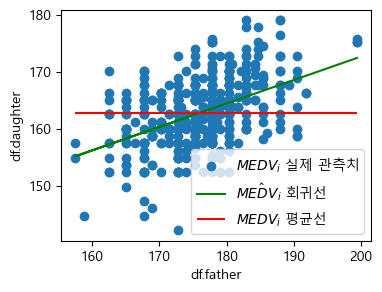

In [183]:
# 2. 산점도(추정된 회귀직선 표시) 확인
# 방법1: 직접 그리기
target_pred = model.predict()

plt.scatter(df.father, df.daughter, marker='o', label='$MEDV_i$ 실제 관측치')
plt.plot(df.father, target_pred, color = 'g', label='$\hat{MEDV}_i$ 회귀선')
plt.hlines(df.daughter.mean(), df.father.min(), df.father.max(), color = 'r', label='$MEDV_i$ 평균선')
plt.legend()
plt.xlabel('df.father')
plt.ylabel('df.daughter')
plt.show()

In [184]:
# 3. 결정계수, 오차항의 분산 𝜎2의 추정량(MSE)구하기
# 방법1: 직접구하기
target_array = df.daughter
target_pred1 = model.predict()

SST = sum((target_array - target_array.mean()) ** 2)  # SST(편차의 제곱, 총변동), 
SSR = sum((target_pred1 - target_array.mean()) ** 2)  # SSR(편차와 잔차의 차이 제곱 : 회귀식으로 설명가능한 변동), 
SSE = sum((model.resid) ** 2)                         # SSE(잔차의 제곱, 오차제곱합 : 회귀식으로 설명하지 못하는 변동)
MSE = SSE / (len(target_array) - 2)                   # MSE(평균제곱오차: 오차항의 분산 𝜎2의 추정량 S2)
S   = np.sqrt(MSE)                                    # S = 오차항의 분산 𝜎2에  대한 추정값의 표준오차 
r_squared = (1 - (SSE/SST))                           # 결정계수


print(f' 결정계수 R-squared : {r_squared : .4f}')

 결정계수 R-squared :  0.2105


In [185]:
# sns.pairplot(pd.concat([df.father, df.daughter], axis= 1),  kind='reg')
# plt.show()

----------------
### #추정된 회귀직선의 정확도

### [실습] 예제 10-7: 추정회귀직선 구하기
봉강의 길이가 온도ㅔ 의해 어느정도 영향을 받는지 관계 확인하기 <br>
- a.온도(X)와 봉강 길이(Y)의 상관도 그리기
- b.최소제곱법을 이용하여 X에 대한 Y의 추정회귀직선 구하기 <br><br>
- $H_0$ : 온도가 증가할 때 봉강의 길이도 증가한다.

- **numpy.polyfit()** : Least squares polynomial 
- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

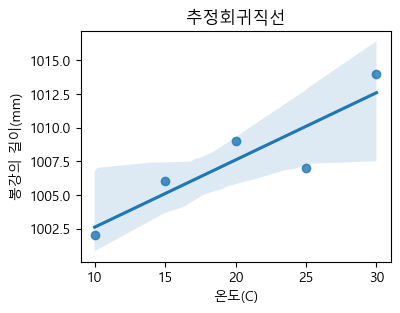

기울기 : 0.50   y절편 : 997.60  
추정회귀직선 : y = 0.50x + 997.60


In [186]:
# 추정회귀직선 상관도 그리기
def draw_linear_regression(a, b, xlabel='X', ylabel='Y'):
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.regplot(x=df.X, y=df.Y) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('추정회귀직선')
    plt.show()    
  
 
# 추정회귀직선 회귀식 구하기 
def get_linear_regression_equation(a, b):
    import numpy as np
    
    z = np.polyfit(a, b, 1)   # 기울기와 절편 구하기
    f = np.poly1d(z)          # f(x) : x값에 따른 y값을 구할 때 사용함
    print(f'기울기 : {z[0]:.2f}   y절편 : {z[1]:.2f}  ')
    print(f'추정회귀직선 : y = {z[0]:.2f}x + {z[1]:.2f}')
#     return z, f

 
    
data = {'X':[10, 15, 20, 25, 30],
        'Y':[1002, 1006, 1009, 1007, 1014]}

df = pd.DataFrame(data)

# 추정회귀직선 상관도 그리기
draw_linear_regression(df.X, df.Y, xlabel='온도(C)', ylabel='봉강의 길이(mm)')
# 추정회귀직선 회귀식 구하기 
get_linear_regression_equation(df.X, df.Y)

### [실습] 예제 10-8: 추정회귀직선 구하기
[예제 10-5]의 물 소비량(X)과 세탁량(Y)의 자료로부터 X에 대한 Y의 추정회귀직선을 구하기

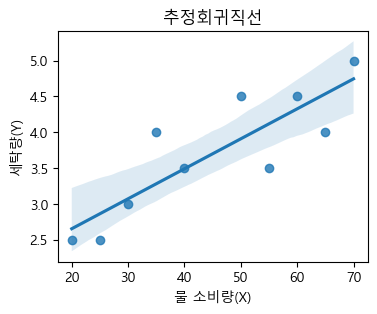

기울기 : 0.04   y절편 : 1.82  
추정회귀직선 : y = 0.04x + 1.82


In [187]:
data = {'X':[20, 30, 25, 40, 35, 50, 70, 60, 65, 55],
        'Y':[2.5, 3.0, 2.5, 3.5, 4.0, 4.5, 5.0, 4.5, 4.0, 3.5]}

df = pd.DataFrame(data)

# 추정회귀직선 상관도 그리기
draw_linear_regression(df.X, df.Y, xlabel='물 소비량(X)', ylabel='세탁량(Y)')
# 추정회귀직선 회귀식 구하기 
get_linear_regression_equation(df.X, df.Y)

### [실습] 예제 10-9: 추정회귀직선 구하기
200여 개의 대리점을 가지고 있는 어느 제품 판매회사에서는 대리점의 크기( X )에 따른 판매 사원의 수( Y )를 예측하기 위해 10개의 대리점을 임의로 추출하여 다음과 같은 자료를 얻었다.<br>
- a.단순선형회귀모형을 가정할 때, 추정회귀직선 구하기
- b.오차항의 분산 $\sigma^2$을 추정하라 : (MSE:평균제곱오차 구하기)
- c.결정계수 $r^2$을 구하가

In [194]:
# 추정회귀직선 회귀식 구하기 
def get_linear_regression_value(a, b, df):
    from statsmodels.formula.api import ols   # ols(Ordinary Least Squares): 선형 모형 계수 추정 방법

    model = ols('df.Y ~ df.X', data=df).fit() # ols('종속변수명 ~ C(독립변수명)+C(독립변수명)..', data=데이터프레임객체)
#     print(model.summary())
    target_array = df.Y
    target_pred1 = model.predict()
    
    # 직접 계산식 이용하는 경우
    SST = np.sum((target_array - np.mean(target_array))**2)  # SST(편차의 제곱, 총변동), 
    SSR = np.sum((target_pred1 - np.mean(target_array))**2)  # SSR(편차와 잔차의 차이 제곱 : 회귀식으로 설명가능한 변동), 
    SSE = np.sum((target_array - target_pred1)**2)           # SSE(잔차의 제곱, 오차제곱합 : 회귀식으로 설명하지 못하는 변동)
    MSE = SSE / (len(target_array) - 2)                   # MSE(평균제곱오차: 오차항의 분산 𝜎2의 추정량 S2)
    S   = np.sqrt(MSE)                                    # S = 오차항의 분산 𝜎2에  대한 추정값의 표준오차 
    r_squared = (1 - (SSE/SST))                           # 결정계수

    print(f'SSE : {SSE : .4f} , n : {len(target_array)}')
    print(f'평균제곱오차:오차항의 분산𝜎2의 추정량(S2)   : {MSE : .4f}')
    print(f'오차항의 분산𝜎2에 대한 추정값의 표준오차(S) : {S : .4f}')
    print(f'결정계수 R-squared : {r_squared : .4f}')
    
#     # 모델 이용하는 경우
#     SSE = sum((model.resid) ** 2)               # 모델 이용
#     print(f'결정계수: {model.rsquared: .4f}')   # 모델 이용



data = {'X':[1, 1, 2, 3, 4, 4, 5, 6, 6, 8],
        'Y':[2, 3, 4, 5, 7, 8, 10, 11, 12, 15]}

df = pd.DataFrame(data)

# 추정회귀직선 상관도 그리기
# draw_linear_regression(df.X, df.Y, xlabel='대리점의크기(X)', ylabel='판매사원수(Y)')

# a.단순선형회귀모형을 가정할 때, 추정회귀직선
get_linear_regression_equation(df.X, df.Y)
print()

# b.오차항의 분산  𝜎2  추정
get_linear_regression_value(df.X, df.Y, df)


기울기 : 1.83   y절편 : 0.37  
추정회귀직선 : y = 1.83x + 0.37

SSE :  2.7667 , n : 10
평균제곱오차:오차항의 분산𝜎2의 추정량(S2)   :  0.3458
오차항의 분산𝜎2에 대한 추정값의 표준오차(S) :  0.5881
결정계수 R-squared :  0.9831


-------------------

## <a name="사이킷런을이용한선형회귀">사이킷런을 이용한 선형회귀</a> 

### 사이킷런(Scikit-learn)
- **대표적인 머신러닝 라이브러리** : https://scikit-learn.org/
- 2007년 구글 하계 코드 프로젝트 모임에 참여한 개발자들 중심으로 시작된 오픈 소스 개발 방식 라이브러리
- 딥러닝 프레임워크는 제공 안함

#### 머신러닝을 위해서는 필요한 것 5가지 
- 1.데이터준비(데이터셋): 특성과 테이블(optional)로 이루어진 데이터
- 2.모델선정: 데이터를 바탕으로 동자기 결정되는 모델
- 3.하이퍼파라미터: 모델 설정 위해 학습에 사용되는 파라미터 (ex: learning rate, 훈련반복횟수, 가중치 초기화 값 등)
- 4.학습:  학습을 위한 훈련단계
- 5.검증: 검증의 여러 단계

#### 선형 회귀분석 모델의 예측력 향상에 좋은 **4가지 기본 가정**
- 1.**선형성**:   독립변수와 종속변수 간의 분포 관계가 **선형의 관계**를 가진다.
- 2.**독립성**:   독립성은 다중 회귀분석의 중요한 기본 가정으로 독립변수와 다른 독립변수 간의 **상관관계가 적을 경우** 선형 회귀 모델의 예측력이 좋아진다.
- 3.**등분산성**: 분산이란 데이터의 분포 정도에 대한 척도인데, 데이터가 특정한 패턴 없이 **고르게 분포**하는 것이, 특정한 좁은 구간에만 집중해서 분포하는 것보다 더 나은 예측을 보인다.
- 4.**정규성**:   잔차(residual)란 회귀직선과 관측값과의 차이인데, 오차(error)라고도 한다. 이 **차이(오차)가 정규성을 만족**해야 한다.

### [실습] 사이킷런으로 선형회귀직선(추정회귀직선) 구하기
예제 10-9 데이터를 이용하여 선형회귀직선 구하기

In [211]:
import pandas as pd
import numpy as np
from sklearn import linear_model  

# 1. 데이터 준비
data = {'X':[1, 1, 2, 3, 4, 4, 5, 6, 6, 8],
        'Y':[2, 3, 4, 5, 7, 8, 10, 11, 12, 15]}
df = pd.DataFrame(data)

# 2. 학습모델 선정
model = linear_model.LinearRegression()  # 선형회귀모델

# 3. 하이퍼파라미터

# 4. 학습
X = [[i] for i in df.X]  # 사이킷런에서 독립변수(X)값은 2차원 형태로 만들어줘야한다.
Y = df.Y
model.fit(X, Y)

# 5. 검증
# y = ax + b
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)
print(f"선형회귀직선: y = {coef[0]:.2f}x + {intercept: .2f}")
print(f"선형회귀직선의 관계점수(R2): {score: .2f}")

선형회귀직선: y = 1.83x +  0.37
선형회귀직선의 관계점수(R2):  0.98


### [실습] 키로 몸무게 추정하는 선형회귀 모델
- 167cm 남학생의 몸무게는?
- 167cm 여학생의 몸무게는? 

In [231]:
# 1. 데이터 준비
df = pd.read_excel('./data/키와몸무게.xlsx')
df

# 2. 학습모델 선정
model = linear_model.LinearRegression()  # 선형회귀모델

# 3. 하이퍼파라미터

# 4. 학습
X = df[['키','구분']]  # 구분: 남자 0, 여자 1
Y = df.몸무게
model.fit(X.values, Y)  # X 대신 X.values (warnings.warn 메시지 안나오게 하려면)

# 5. 검증
# y = ax + b
coef = model.coef_               # 직선의 기울기(a)
intercept = model.intercept_     # 직선의 절편(b)
score = model.score(X, Y)        # 추정된 회귀직선의 정확도(결정계수 r2)
print(f"선형회귀직선: y = {coef[0]:.2f}x + {intercept: .2f}")
print(f"선형회귀직선의 관계점수(R2): {score: .2f}")
print(f"167cm 남학생 추정 몸무게: {model.predict([[167,0]])}")
print(f"167cm 여학생 추정 몸무게: {model.predict([[167,1]])}")
print(f"167cm 남학생, 여학생의 추정 몸무게: {model.predict([[167,0], [167,1]])}")

선형회귀직선: y = 0.75x + -61.23
선형회귀직선의 관계점수(R2):  0.84
167cm 남학생 추정 몸무게: [63.69388959]
167cm 여학생 추정 몸무게: [56.46358918]
167cm 남학생, 여학생의 추정 몸무게: [63.69388959 56.46358918]


C:\python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### [실습] 사이킷런 오차 함수 : 평균 제곱 오차

In [233]:
from sklearn.metrics import mean_squared_error

y = np.array([1.2, 2.4, 2.5, 4.6, 5.4]) # 실측치
y_hat = np.array([1, 2, 3, 4, 5])       # 추정치

MSE = np.sum((y_hat - y)**2) /len(y)
print(f'평균제곱오차(MSE) 직접계산: {MSE}')
print(f'평균제곱오차(MSE) 함수사용: {mean_squared_error(y_hat, y)}')

평균제곱오차(MSE) 직접계산: 0.19399999999999995
평균제곱오차(MSE) 함수사용: 0.19399999999999995


### [실습] 경사하강법과 학습의 원리
- learning_rate : 경사 하강법에서 반복적으로 조금씩 최소값에 접근할 때 변화되는 변수 x의 양
- epoch :  전체 데이터를 모두 넣어서 에러를 구하는 것을 1 에폭이라고 한다.

w= 0.63, b=-1.65
선형회귀직선: y = 0.63x + -1.65


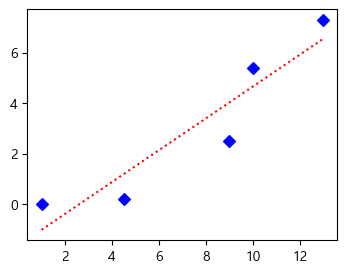

In [243]:
X = np.array([1, 4.5, 9, 10, 13])
Y = np.array([0, 0.2, 2.5, 5.4, 7.3])

# 직접계산하여 
w, b = 0, 0   # y = wx + b 의 초기값
learning_rate, epoch = 0.005, 1000  # 학습률과 학습 횟수
for i in range(epoch):
    y_pred = w*X + b      # 추정 선형회귀직선 식
    error = y_pred - Y    # 성능척도: 잔차
    w = w - learning_rate * (error * X).sum()    
    b = b - learning_rate * error.sum()
    
print(f'w={w: .2f}, b={b: .2f}')
print(f"선형회귀직선: y = {w:.2f}x + {b: .2f}")

    
# 산점도 + 추정회귀직선
plt.scatter(X, Y, color='blue', marker='D')
y_pred = w*X + b
plt.plot(X, y_pred, 'r:')
plt.show()

--------------------------------

### [실습] 사이킷런으로 상관분석하기 :  국가별 기대수명 
- Data : https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who 
- WHO 데이터 : 2000 ~ 2015년 나라별 기대수명과 보건 예산, 질병 통계, 비만도 등 

In [290]:
# 1. 데이터 준비
df = pd.read_csv('./data/life_expectancy.csv')
df.head(3)

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


C:\Users\yswoo\AppData\Local\Temp\ipykernel_27624\3373688541.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


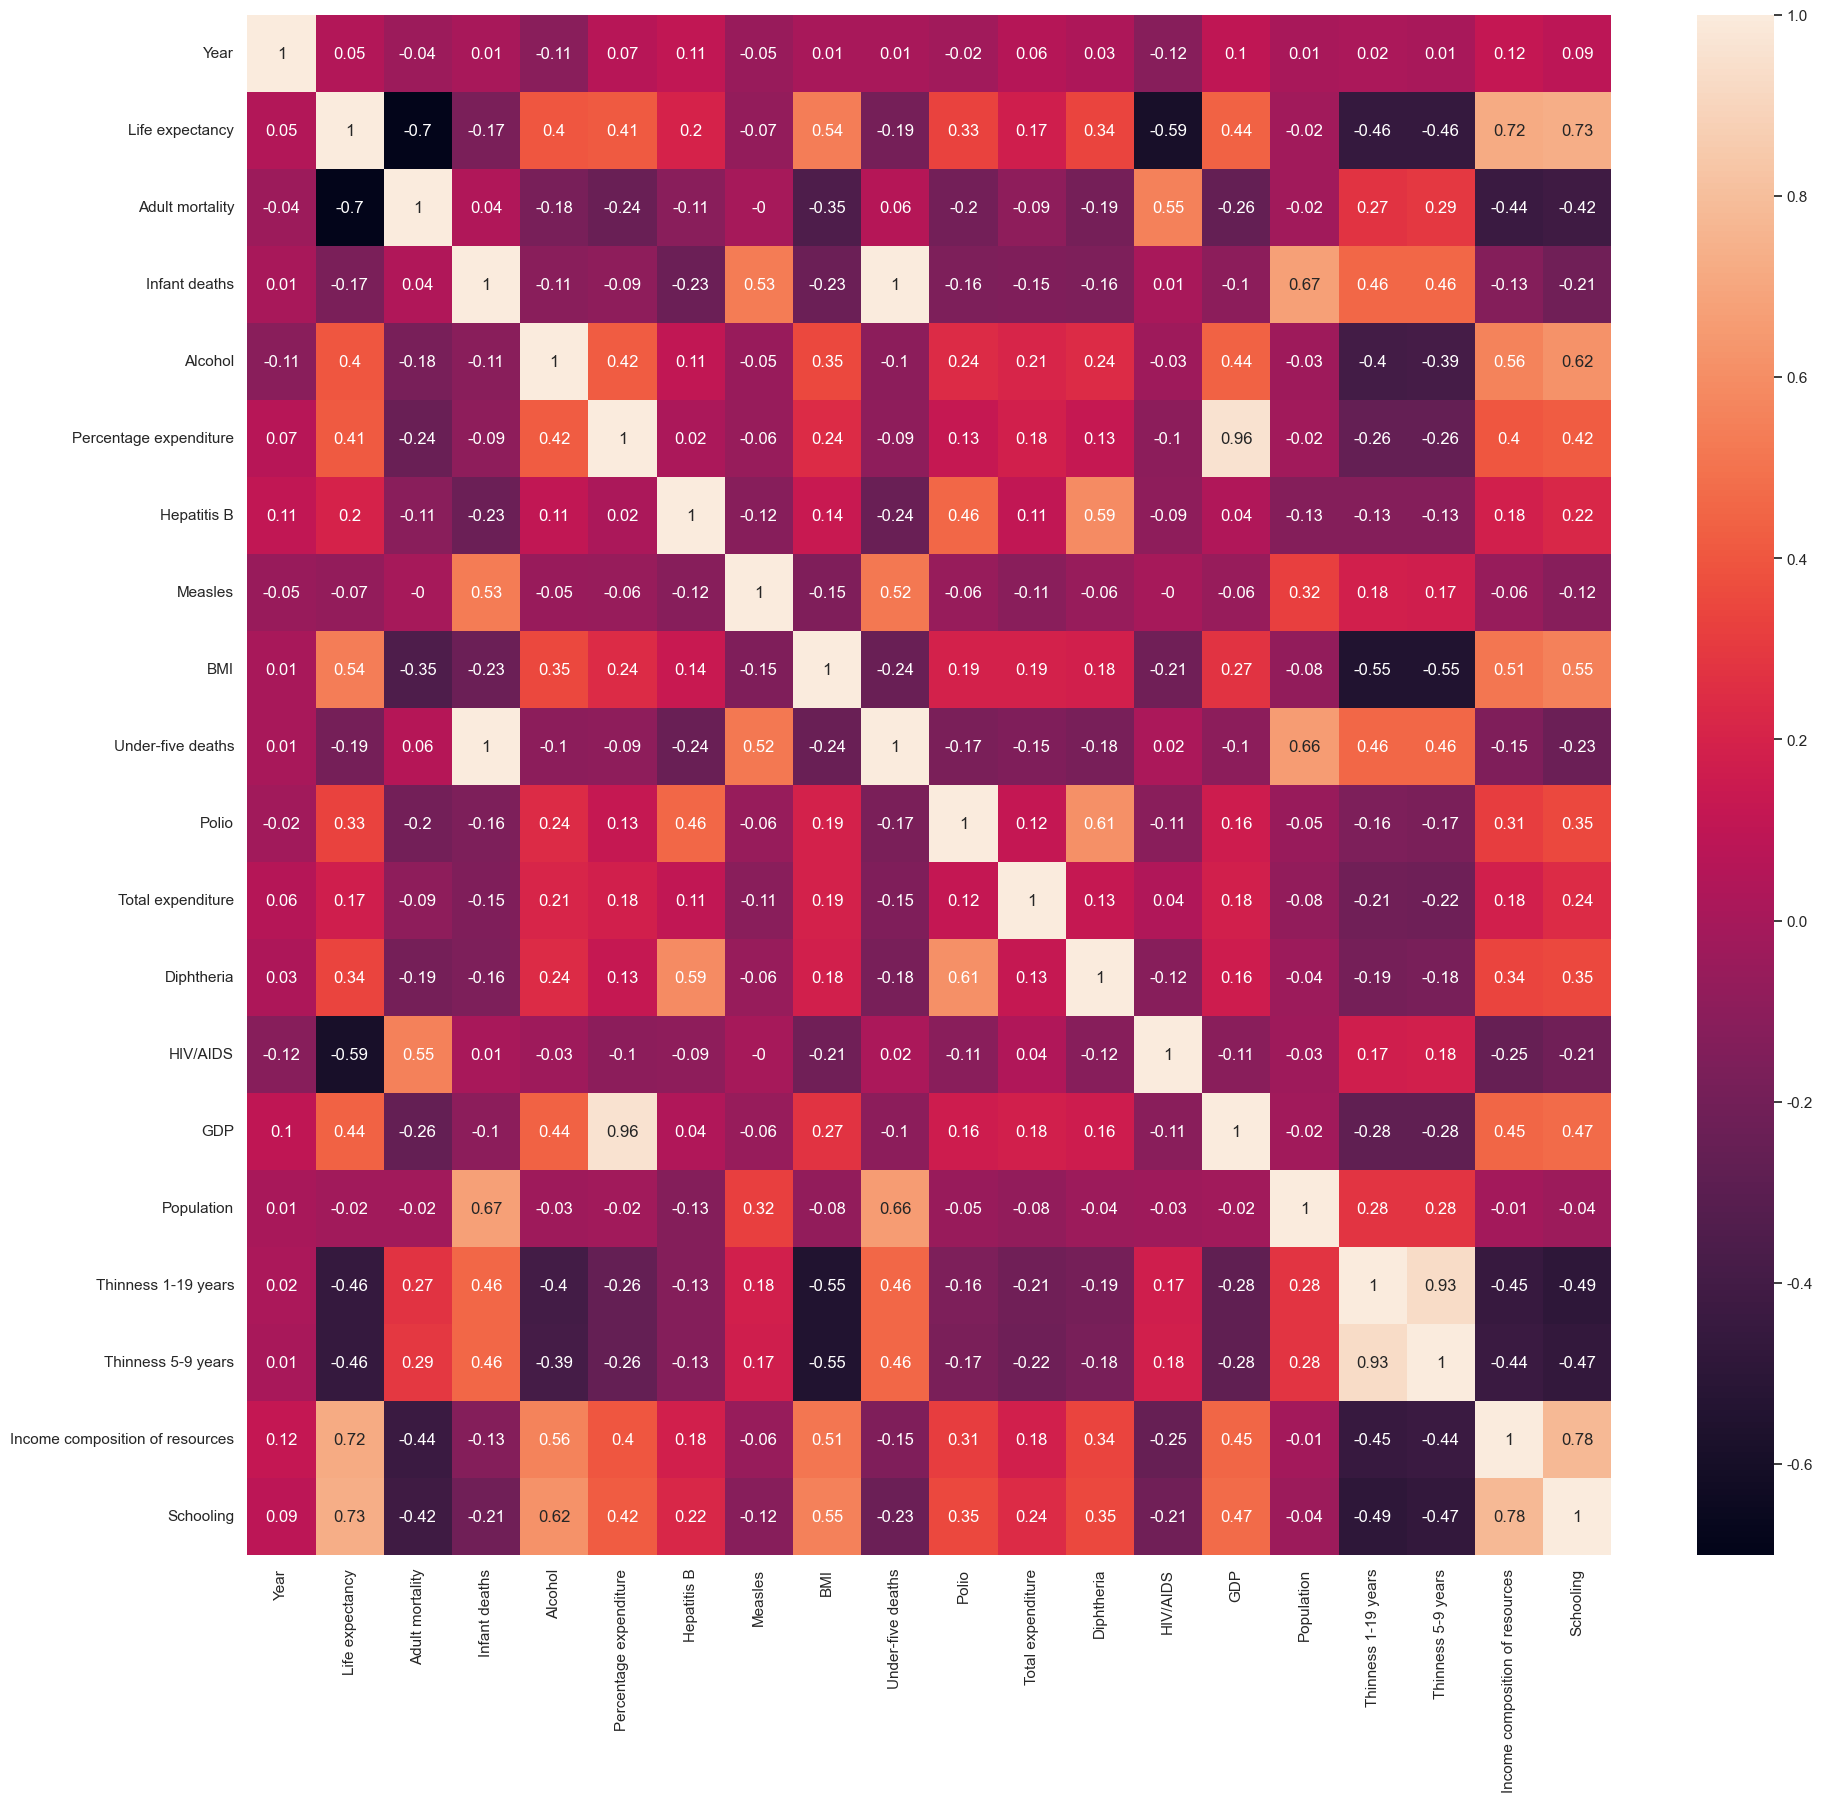

In [291]:
# 컬럼간 상관관계 확인
df.dropna(inplace=True)   # 결측치 제거

correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(22, 20)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

기대수명과 상관계수 높은 변수


C:\Users\yswoo\AppData\Local\Temp\ipykernel_27624\504533341.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr().round(3)['Life expectancy']


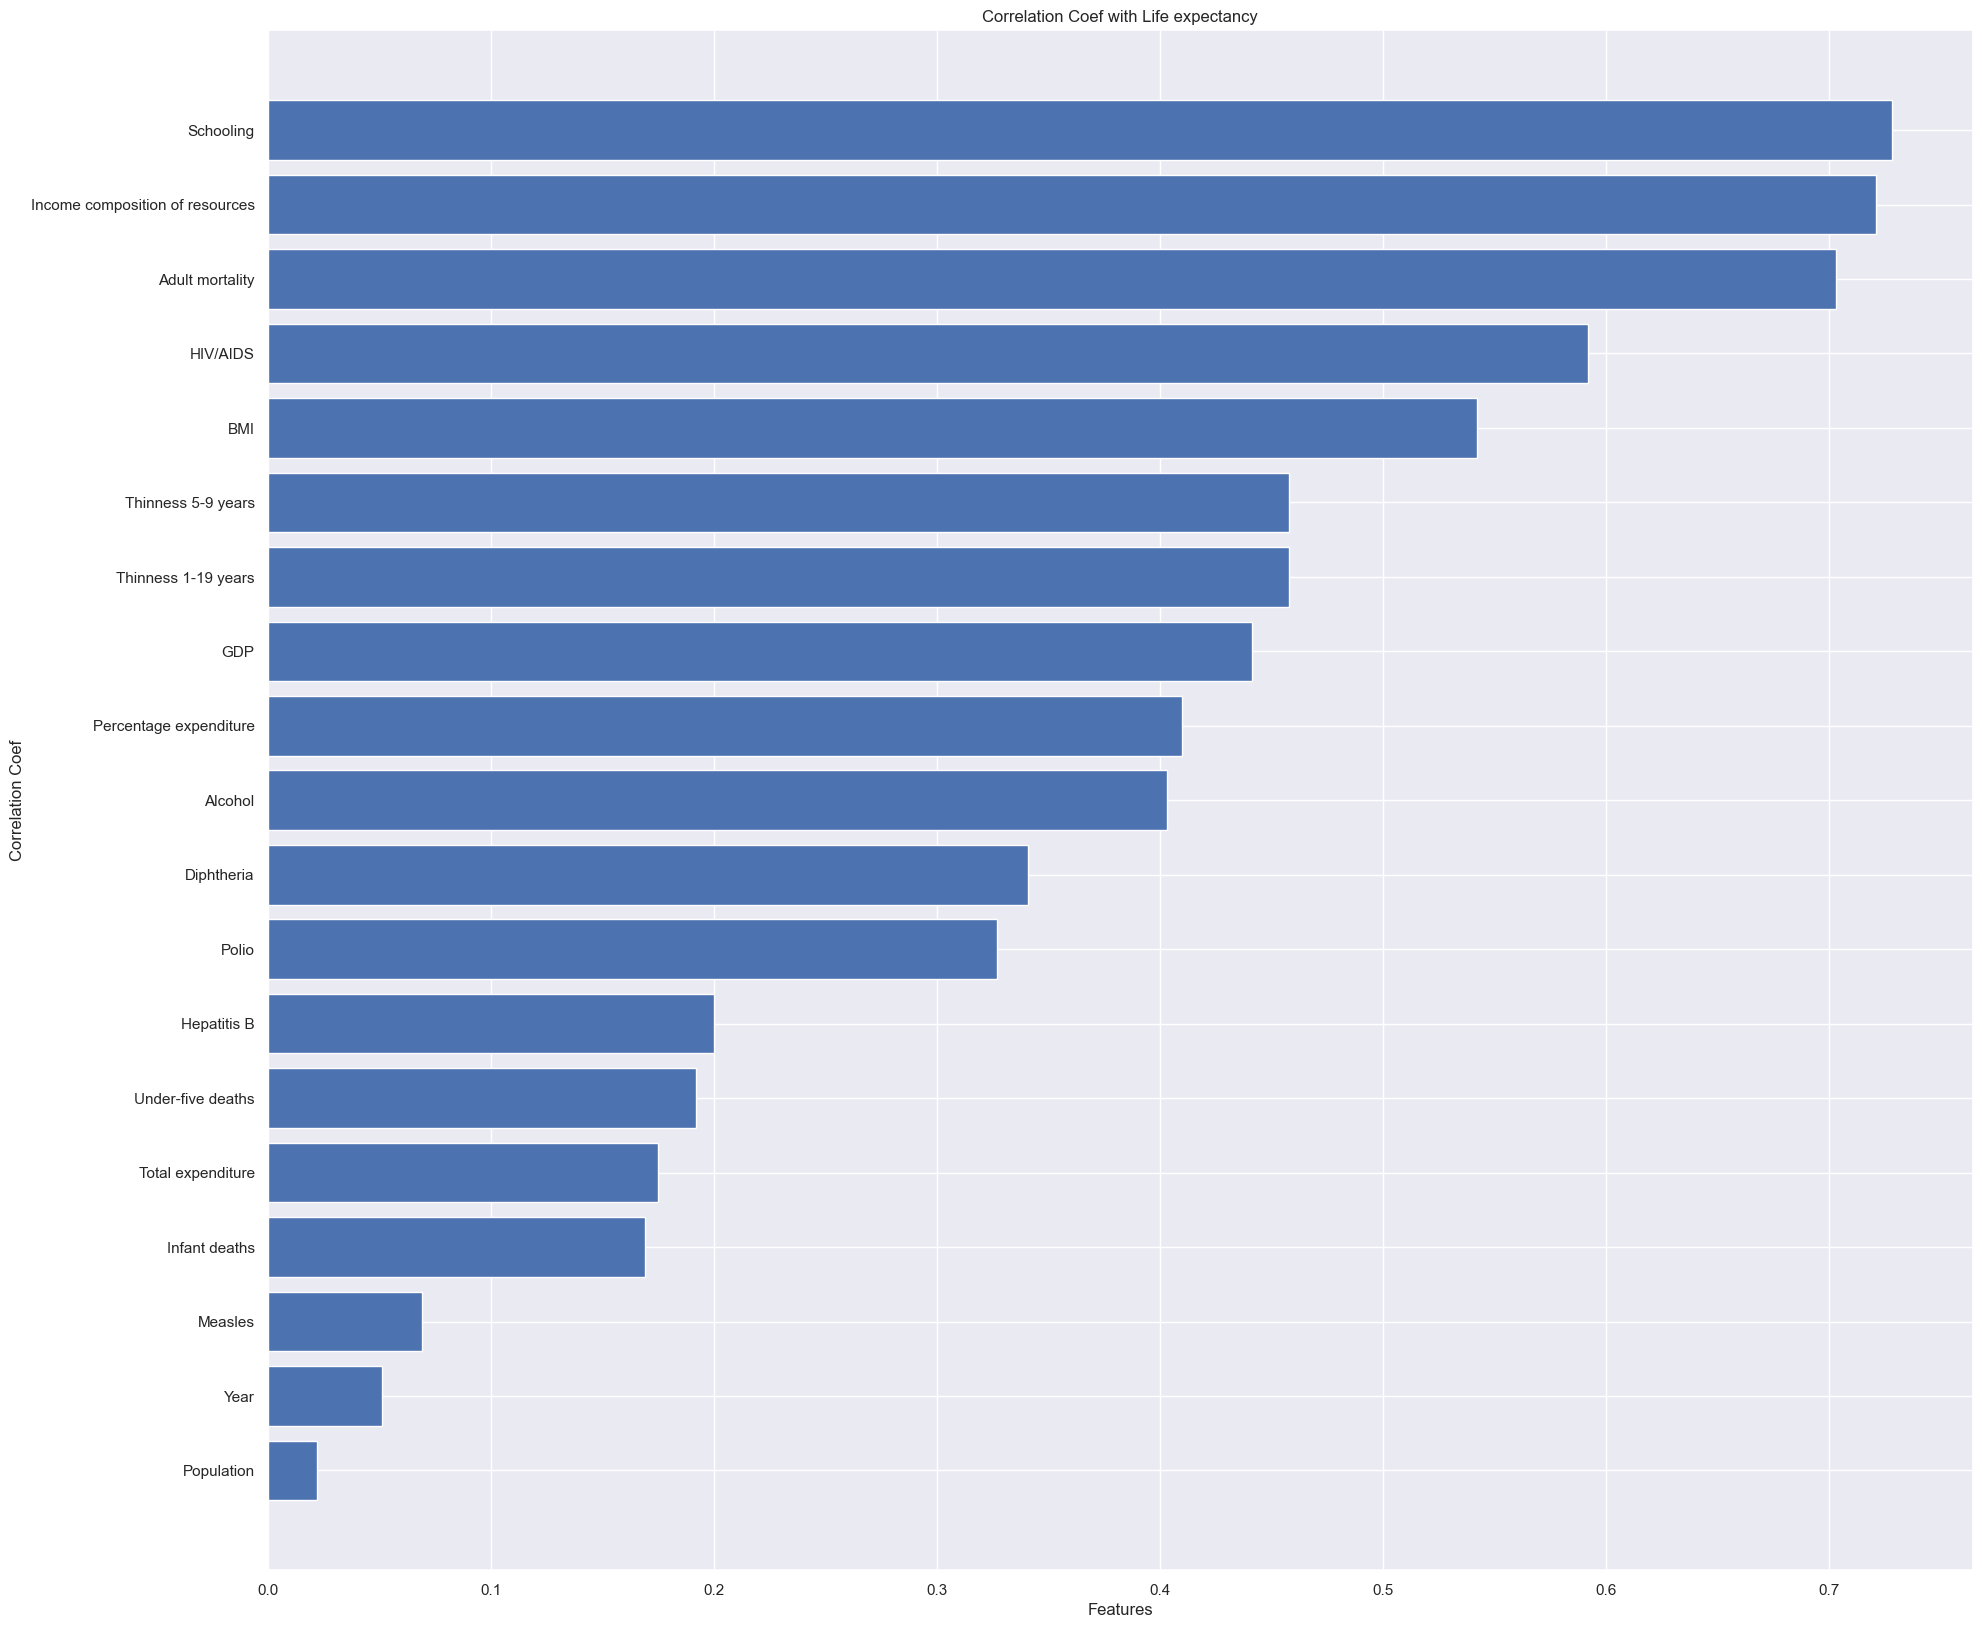

In [294]:
# 기대수명과 피어슨 상관계수 높은 컬럼 선택
print('기대수명과 상관계수 높은 변수')
c = df.corr().round(3)['Life expectancy'] 
c = np.abs( c ) # 상관계수 절대값

c.sort_values(ascending=True, inplace=True)  # 오름차순 정렬
c = c[:-1]   # 자기 자신을 제외

# 시각화
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')
plt.show()

기대수명과 상관관계 높은 컬럼 : ['Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'BMI']


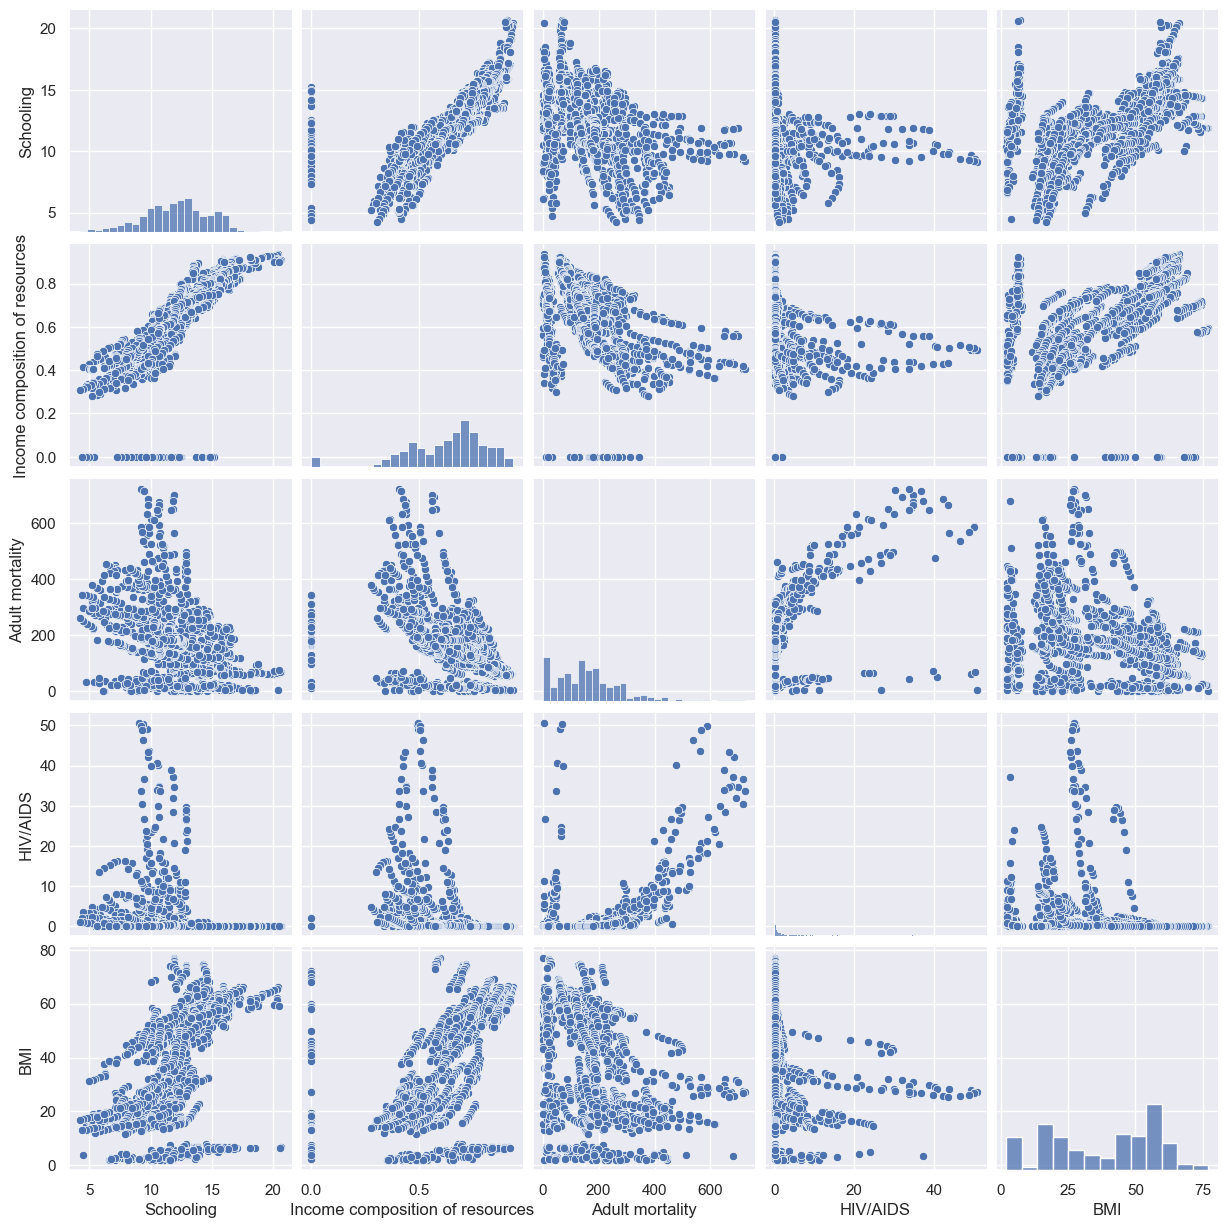

In [297]:
# 기대수명과 피어슨 상관계수 높은 컬럼 선택
# 조건 검색
c = c[c.values > 0.5]     # 상관계수 0.5 이상인 값 추출
c.sort_values(ascending=False, inplace=True)  # 내림차순 정렬
print(f'기대수명과 상관관계 높은 컬럼 : {c.index.to_list()}' )            # 컬럼명

# 시각화
sns.pairplot(df[c.index.to_list()])
plt.show()

In [298]:
# 선형회귀모델 점수 확인
X = df[c.index.to_list()]
Y = df['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'선형회귀모델 점수 = {model.score(X_test, y_test): .3f}')


선형회귀모델 점수 =  0.826


--------

끝